In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [50]:
df = pd.read_csv('ProstateCancer.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,0,1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,1,2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,2,3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,3,4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,4,5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T


In [51]:
df = df.drop(columns=['Unnamed: 0.1','Unnamed: 0'])

In [52]:
df.describe()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,1.350010,3.628943,63.865979,0.100356,0.216495,-0.179366,6.752577,24.381443,2.478387
std,1.178625,0.428411,7.445117,1.450807,0.413995,1.398250,0.722134,28.204035,1.154329
min,-1.347074,2.374906,41.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,-0.430783
25%,0.512824,3.375880,60.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,1.731656
50%,1.446919,3.623007,65.000000,0.300105,0.000000,-0.798508,7.000000,15.000000,2.591516
75%,2.127041,3.876396,68.000000,1.558145,0.000000,1.178655,7.000000,40.000000,3.056357
max,3.821004,4.780383,79.000000,2.326302,1.000000,2.904165,9.000000,100.000000,5.582932


In [53]:
df.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T


In [54]:
df.isna().sum()

lcavol     0
lweight    0
age        0
lbph       0
svi        0
lcp        0
gleason    0
pgg45      0
lpsa       0
train      0
dtype: int64

In [55]:
train_mask = df.pop('train')

<AxesSubplot:>

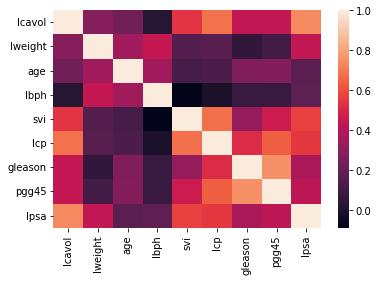

In [56]:
sns.heatmap(df.corr())

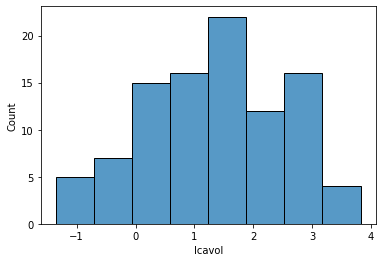

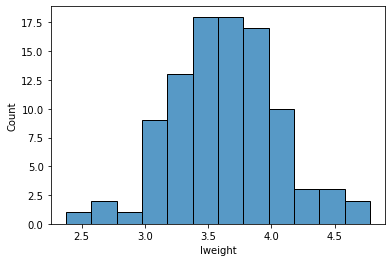

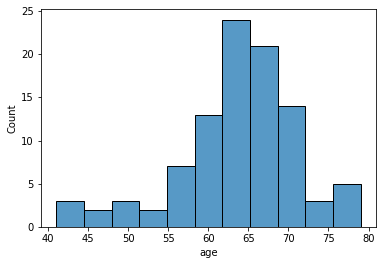

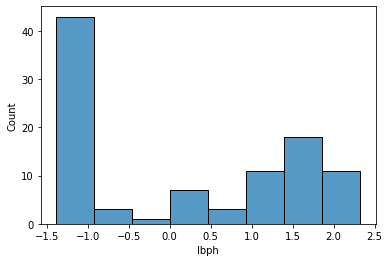

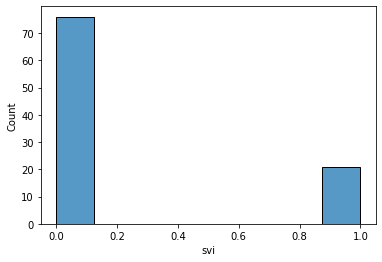

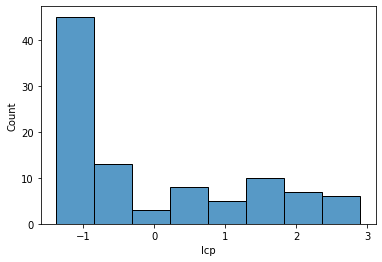

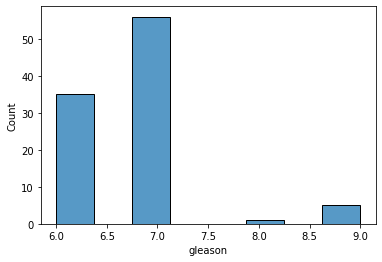

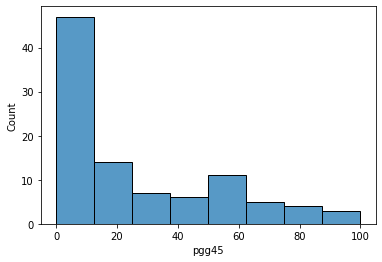

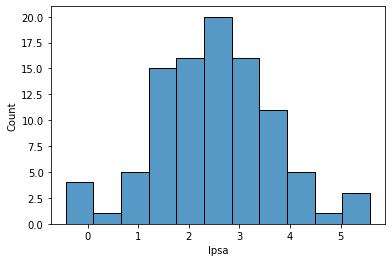

In [57]:
#svi and gleason is categorical
for i in df.columns:
    sns.histplot(df[i])
    plt.show()

In [58]:
#Separate the targets and standardize the predictors
y = df.pop('lpsa')
y = (y-min(y))/(max(y)-min(y))
df = (df-df.mean())/df.std()

In [59]:
y_train = y[train_mask == 'T']
y_test = y[train_mask == 'F']

x_train = df[train_mask == 'T']
x_test = df[train_mask == 'F']

In [60]:
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge

In [63]:
for i in [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1,0.5, 1,10]:
    ridge = Ridge(alpha=i)
    ridge.fit(x_train,y_train)
    p = ridge.predict(x_test)
    print(i,np.sum((y_test-p)**2))

1e-06 0.4324158613689899
1e-05 0.43241578784513807
0.0001 0.4324150526167697
0.001 0.43240770134809203
0.01 0.4323342900506261
0.1 0.43161020610271594
0.5 0.4286011863841273
1 0.4252726397392413
10 0.4037337582307595


In [64]:
#Linear Regression
lr = LinearRegression().fit(x_train,y_train)
p = lr.predict(x_test)
np.sum((y_test-p)**2)

0.432415869538318

In [65]:
#SGD regressor
sgd = SGDRegressor().fit(x_train,y_train)
p = sgd.predict(x_test)
np.sum((y_test-p)**2)

0.5370771118988993

In [66]:
#Ridge with alpha= 10
ridge = Ridge(alpha=10)
ridge.fit(x_train,y_train)
p = ridge.predict(x_test)
np.sum((y_test-p)**2)

0.4037337582307595

In [67]:
#Dimensionality reduction wi
from sklearn.decomposition import PCA

In [73]:
pca = PCA(n_components=0.95).fit(x_train)

In [74]:
tr_x = pca.transform(x_train)
tr_test_x = pca.transform(x_test)
print(tr.shape)
x_train.shape

(67, 6)


(67, 8)

In [75]:
lr = LinearRegression().fit(tr_x,y_train)
p = lr.predict(tr_test_x)
np.sum((y_test-p)**2)

0.3727605450593645